---
###  분산과 표준편차

#### 확률분포의 분산

 - $\sigma^2 = Var[X] = E[(X-\mu)^2]$
 
 - 이산확률변수 : $\sigma^2 = \sum_{x_i \in \Omega}(x_i - \mu)^2p(x_i)$
 
 - 연속확률변수 : $\sigma^2 = \int^\infty_\infty(x-\mu)^2p(x)dx$

---
#### 분산의 성질

 - 분산은 항상 0 또는 양수이다. 
 
     $Var[X]\geq0$
     
     
 - 확률변수가 아닌 상수값 c에 대해
 
     $Var[c] = 0$
     
     $Var[cX] = c^2Var[X]$
     
     
 - 기대값 성질을 이용
 
     $Var[X] = E[X^2] - (E[X])^2 = E[X^2]-\mu^2$
     
     $E[X^2] = \mu^2 + Var[X]$
     
     
 - 확률변수 합의 분산
 
     $Var[X+Y] = Var[X] + Var[Y] -2E[(X-\mu_X)(Y-\mu_Y)]$
     
     
 - 확률변수의 독립
 
     $E[(X-\mu_x)(Y-\mu_Y)]$
     
     $Var[X+Y] = Var[X]+Var[Y]$
     
---
#### 표본평균의 분산

 - $Var[\bar X] = \frac{1}{N}Var[X]$
 - 표본평균을 계산한 표본 개수가 커지면 표본평균의 값의 변동은 작아진다..
 
 
 1) 데이터를 생성하는 확률변수 $X$의 기대값을 구하려면 확률밀도함수 $P(x)$의 수식을 알아야함.
 
 2) 표본평균이라는 새로운 확률변수 $\bar X$ 의 기대값 $E[\bar X]$은 원래 확률 변수 $X$의 기대값 $E[X]$와 같으므로 표본평균 $\bar x$는 비슷한 값이 나오지만 정확하지는 않다. 
 
 3) 표본개수 $N$이 크면 표본평균 $\bar x$의 분산이 아주 작아지므로 표본평균의 값 $\bar x$는 항상 표본평균의 기대값 $E[\bar X] = E[X]$ 근처의 거의 일정한 값이 나올 것이다.
 
 4) 따라서 표본 개수 $N$ 이 크면 표본평균 $\bar x$는 원래 확률변수 $N$의 기대값 $E[X]$ 의 근사값이라고 할 수 있다.
 
 
--- 

#### 표본분산의 기대값

 - $E[S^2] = \frac{N-1}{N}\sigma^2$
 
   - 표본분산 $S^2$의 기대값을 구하면 이론적인 분산값의 $\frac{N-1}{N}$ 
   
       $\rightarrow$표본분산값이 이론적인 분산값보다 더 작아진다.
       
       
 - 표본분산이 실제분산보다 작아지는 이유 
 
  1) 표본분산을 계산할 때 사용한은 표본평균의 값이 데이터가 많이 몰려있는 쪽으로 편향되게 나온다. 
  
  2) 데이터가 몰려있는 위치에 있는 표본평균을 기준으로 각 데이터까지의 거리를 계산하면 원래의 기대값으로부터의 거리보다 작게 나올 수 있다.
  

In [248]:
np.random.seed(15)

In [249]:
N = 7
data = np.sort(np.random.normal(size=(N)))[::-1]

In [250]:
mean = np.mean(data)
mean

-0.46494862738581794

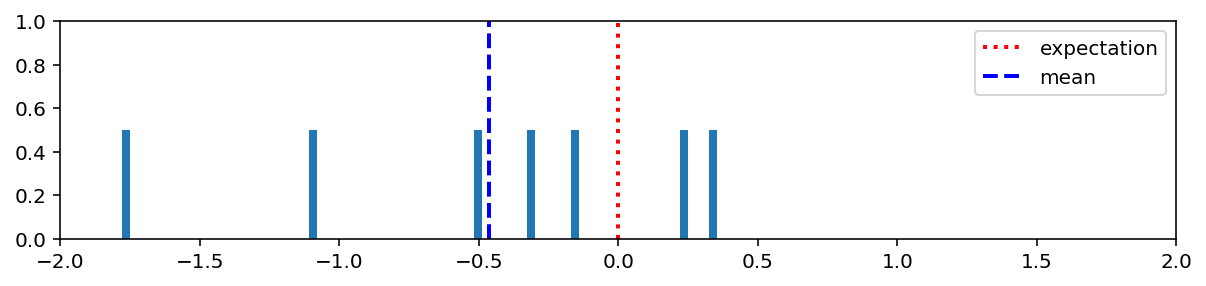

In [253]:
plt.figure(figsize=(10, 2))
sns.rugplot(data, height=0.5, linewidth=4)
x = np.linspace(-3, 3, 100)
plt.axvline(x=0, ls=':', c='r', linewidth=2, label='expectation')
plt.axvline(x=mean, ls='--', c='b', linewidth=2, label='mean')
plt.legend()
plt.xlim(-2, 2)
plt.show()

In [254]:
distance_from_sample_mean = data - mean
distance_from_sample_mean

array([ 0.80423333,  0.70051752,  0.30904009,  0.15262015, -0.03684105,
       -0.63091342, -1.29865663])

In [256]:
sample_variance = (distance_from_sample_mean ** 2).mean()
sample_variance

0.4774618257836171

In [257]:
sample_variance * N / (N-1)

0.5570387967475533

#### 비대칭도와 첨도

 - 비대칭도 (skew)
     
     $E[(\frac{X-\mu}{\sigma})^3] = \frac{\mu_3}{\sigma^3}$
     
 - 첨도 (kurtosis)
 
     $E[(\frac{X-\mu}{\sigma})^4] = \frac{mu_4}{\sigma^4}$
     
#### 모멘트 (moment)

 - $\mu_n = E[(X-\mu)^n] = \int(x-\mu)^np(x)dx$
 


### 다변수 확률변수

#### 결합확률질량함수 (joint probability mass function)

 - $p_{XY}(x,y)$

In [261]:
grades = ['A', 'B', 'C', 'D', 'E', 'F']
scores = pd.DataFrame(
    [[1, 2, 1, 0, 0, 0],
     [0, 2, 3, 1, 0, 0],
        [0, 4, 7, 4, 1, 0],
        [0, 1, 4, 5, 4, 0],
        [0, 0, 1, 3, 2, 0],
        [0, 0, 0, 1, 2, 1]],
    columns=grades, index=grades)
scores.index.name = 'Y'
scores.columns.name = 'X'
scores

X,A,B,C,D,E,F
Y,,,,,,
A,1,2,1,0,0,0
B,0,2,3,1,0,0
C,0,4,7,4,1,0
D,0,1,4,5,4,0
E,0,0,1,3,2,0
F,0,0,0,1,2,1


In [262]:
pmf = scores / scores.values.sum()
pmf

X,A,B,C,D,E,F
Y,,,,,,
A,0.02,0.04,0.02,0.00,0.00,0.00
B,0.00,0.04,0.06,0.02,0.00,0.00
C,0.00,0.08,0.14,0.08,0.02,0.00
D,0.00,0.02,0.08,0.10,0.08,0.00
E,0.00,0.00,0.02,0.06,0.04,0.00
F,0.00,0.00,0.00,0.02,0.04,0.02


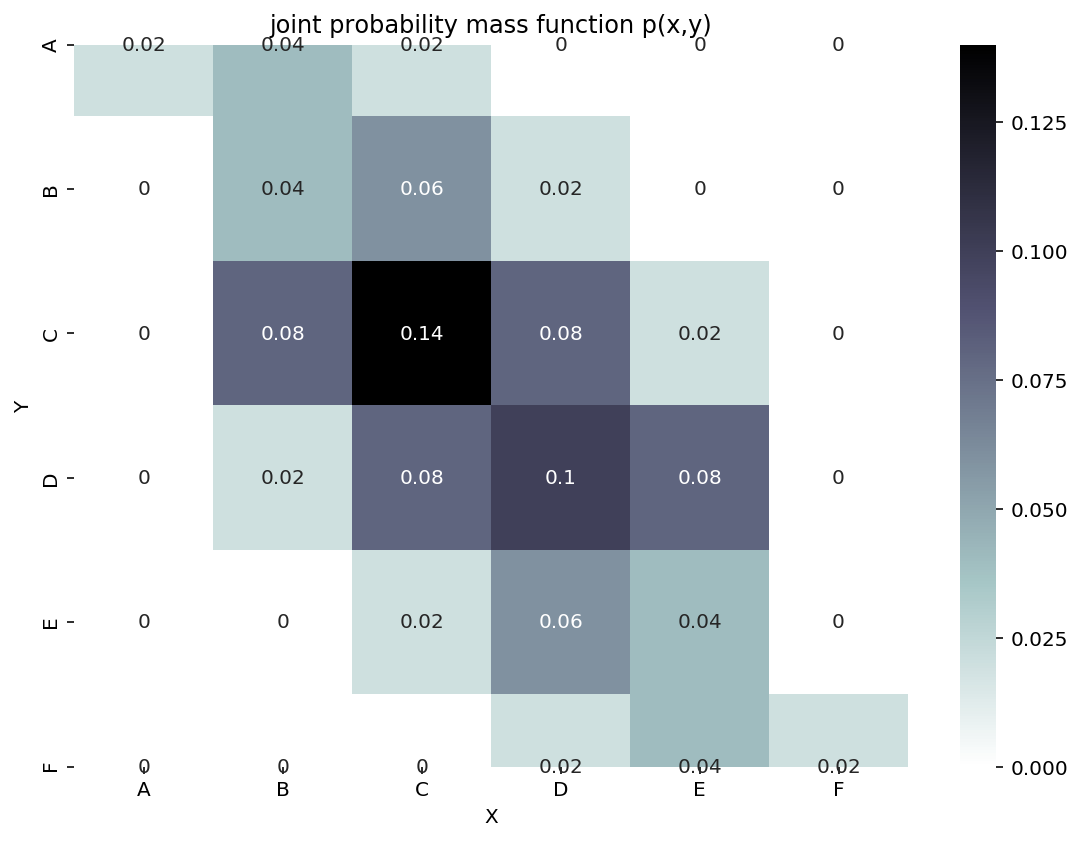

In [295]:
sns.heatmap(pmf, cmap=mpl.cm.bone_r, annot=True, 
            xticklabels=['A', 'B', 'C', 'D', 'E', 'F'],
            yticklabels=['A', 'B', 'C', 'D', 'E', 'F'])
plt.title("joint probability mass function p(x,y)")
plt.tight_layout(pad=-6)
plt.show()

#### 주변확률질량함수 (marginal probability mass function)

 - $p_X(x) = \sum_{y_i}p_{XY}(x,y_i)$
 - $p_Y(y) = \sum_{X_i}p_{XY}(x_i,y)$

In [297]:
pmf_marginal_x = pmf.sum(axis=0)
pmf_marginal_x

X
A    0.02
B    0.18
C    0.32
D    0.28
E    0.18
F    0.02
dtype: float64

In [299]:
pmf_marginal_y = pmf.sum(axis=1)
pmf_marginal_y[:,np.newaxis]

array([[0.08],
       [0.12],
       [0.32],
       [0.28],
       [0.12],
       [0.08]])

#### 조건부확률질량함수

 - $p_{X|Y}(x|y) = \frac{p_{XY}(x,y)}{p_Y(y)}$
 - $p_{Y|X}(y|x) = \frac{p_{XY}(x,y)}{p_X(x)}$
 
 $\rightarrow$ 점수가 $Y$일 경우 $p_Y(y)$로 나눠줌으로써 전체의 합이 1이 되도록 normalize